In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
import numpy as np
import math

In [3]:
df = pd.read_csv(r'world_development_data_imputed.csv')
df['Year'] = df['Year'].astype(int)
df = df.drop(columns = ['AdolFertRate', 'AgriValAdd%GDP', 'FDINetBoP', 'GNI/CapAtlas', 'GNIAtlas', 'IndValAdd%GDP', 'MerchTrade%GDP', 'MobileSubs/100'])
df

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,Exports%GDP,FertRate,Imports%GDP,InflConsPric%,LifeExpBirth,MortRateU5,NetMigr,UrbanPopGrowth%
0,2000,Afghanistan,Asia,Southern Asia,652860.0,19542982,29.963329,1.443803,1.801248e+10,-5.206288,13.315247,7.534,41.312634,37.611028,55.298000,129.3,-1007135,1.861377
1,2000,Malta,Europe,Southern Europe,320.0,390087,1219.021875,NaN,NaN,19.681791,120.247484,1.680,128.374581,-4.512396,78.348780,7.6,1799,0.952299
2,2000,Belgium,Europe,Western Europe,30530.0,10251250,NaN,0.242518,2.367920e+11,3.716679,72.547395,1.670,69.682740,2.014617,77.721951,5.9,32262,0.308431
3,2000,Marshall Islands,Oceania,Micronesia,180.0,54224,301.244444,0.721838,1.153475e+08,1.354079,28.696331,4.592,100.812761,-0.454689,63.275000,42.1,-1323,1.492787
4,2000,Mauritania,Africa,Sub-Saharan Africa,1030700.0,2695003,2.614731,2.799182,NaN,-3.918026,25.517116,5.459,33.423259,6.351587,61.028000,98.8,-2997,2.476860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,2021,Morocco,Africa,Northern Africa,446550.0,37076584,83.075474,1.051484,1.428670e+11,7.929668,32.931642,2.328,42.020038,3.244246,74.042000,18.0,-46242,1.886932
4440,2021,Montenegro,Europe,Southern Europe,13810.0,619211,NaN,-0.337763,5.861431e+09,13.043464,42.834355,1.750,62.195638,4.726248,73.824390,2.3,-101,0.161803
4441,2021,Mongolia,Asia,Eastern Asia,1564116.0,3347782,2.149449,NaN,NaN,1.636770,58.548864,2.837,60.549214,14.420065,70.975000,14.7,0,1.795620
4442,2021,Kenya,Africa,Sub-Saharan Africa,580370.0,53005614,93.132821,1.942761,1.097040e+11,7.590489,10.774181,3.335,19.915101,4.330748,61.427000,37.2,-52549,3.706017


In [4]:
missing = df[df['PopDens'].isnull() | df['GDP'].isnull() | df['PopGrowth%'].isnull()]
train = df.dropna()
X = train[['SurfAreaSqKm','PopTotal']]
Y = train['PopDens']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
X_missing = missing[missing['PopDens'].isnull()][['SurfAreaSqKm','PopTotal']]
Y_result = regr.predict(X_missing)
Y_result = pd.Series(Y_result)
i = 0
for j in range(len(missing['PopDens'])):
    if math.isnan(missing['PopDens'].iloc[j]):
        missing['PopDens'].iloc[j] = Y_result[i]
        i += 1
missing

<ipython-input-4-e0f5d67af5d6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['PopDens'].iloc[j] = Y_result[i]


,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,Exports%GDP,FertRate,Imports%GDP,InflConsPric%,LifeExpBirth,MortRateU5,NetMigr,UrbanPopGrowth%
1,2000,Malta,Europe,Southern Europe,320.000,390087,1219.021875,NaN,NaN,19.681791,120.247484,1.680,128.374581,-4.512396,78.348780,7.600000,1799,0.952299
2,2000,Belgium,Europe,Western Europe,30530.000,10251250,342.102512,0.242518,2.367920e+11,3.716679,72.547395,1.670,69.682740,2.014617,77.721951,5.900000,32262,0.308431
4,2000,Mauritania,Africa,Sub-Saharan Africa,1030700.000,2695003,2.614731,2.799182,NaN,-3.918026,25.517116,5.459,33.423259,6.351587,61.028000,98.800000,-2997,2.476860
35,2000,Madagascar,Africa,Sub-Saharan Africa,587040.000,16216431,313.710918,3.039901,4.629247e+09,4.456859,19.119668,5.403,23.657454,11.570353,57.938000,105.300000,485,4.032964
69,2000,North Macedonia,Europe,Southern Europe,25710.000,2026350,341.151600,0.455449,NaN,4.549136,32.946840,1.861,47.213307,8.178383,72.946341,16.000000,5516,0.099089
113,2000,Croatia,Europe,Southern Europe,56540.000,4468302,79.916691,-0.986435,NaN,2.958798,35.024511,1.390,39.526546,4.336679,72.807805,8.300000,-50791,-0.555021
159,2000,Singapore,Asia,South-eastern Asia,680.000,4027887,6011.771642,NaN,9.607652e+10,9.038316,188.350890,1.600,176.013630,3.863478,77.951220,3.900000,39387,1.732042
184,2000,South Africa,Africa,Sub-Saharan Africa,1219090.000,46813266,38.590101,0.962864,NaN,4.200000,24.404303,2.413,21.816418,9.182191,58.470000,71.000000,-80388,1.810162
256,2001,West Bank and Gaza,Asia,Western Asia,6020.000,2997784,497.970764,2.555268,NaN,-9.310638,15.383270,5.315,67.342708,2.344689,69.887000,29.400000,-25657,2.860489
851,2004,Belgium,Europe,Western Europe,30530.000,10421137,344.159082,NaN,3.692150e+11,3.571204,70.906277,1.720,66.012128,1.914991,78.878049,5.200000,43994,0.488278


In [5]:
X = train[['FertRate','MortRateU5', 'NetMigr']]
Y = train['PopGrowth%']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
X_missing = missing[missing['PopGrowth%'].isnull()][['FertRate','MortRateU5', 'NetMigr']]
Y_result = regr.predict(X_missing)
Y_result = pd.Series(Y_result)
i = 0
for j in range(len(missing['PopGrowth%'])):
    if math.isnan(missing['PopGrowth%'].iloc[j]):
        missing['PopGrowth%'].iloc[j] = Y_result[i]
        i += 1

missing

<ipython-input-5-f3ef4d726679>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['PopGrowth%'].iloc[j] = Y_result[i]


,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,Exports%GDP,FertRate,Imports%GDP,InflConsPric%,LifeExpBirth,MortRateU5,NetMigr,UrbanPopGrowth%
1,2000,Malta,Europe,Southern Europe,320.000,390087,1219.021875,0.674855,NaN,19.681791,120.247484,1.680,128.374581,-4.512396,78.348780,7.600000,1799,0.952299
2,2000,Belgium,Europe,Western Europe,30530.000,10251250,342.102512,0.242518,2.367920e+11,3.716679,72.547395,1.670,69.682740,2.014617,77.721951,5.900000,32262,0.308431
4,2000,Mauritania,Africa,Sub-Saharan Africa,1030700.000,2695003,2.614731,2.799182,NaN,-3.918026,25.517116,5.459,33.423259,6.351587,61.028000,98.800000,-2997,2.476860
35,2000,Madagascar,Africa,Sub-Saharan Africa,587040.000,16216431,313.710918,3.039901,4.629247e+09,4.456859,19.119668,5.403,23.657454,11.570353,57.938000,105.300000,485,4.032964
69,2000,North Macedonia,Europe,Southern Europe,25710.000,2026350,341.151600,0.455449,NaN,4.549136,32.946840,1.861,47.213307,8.178383,72.946341,16.000000,5516,0.099089
113,2000,Croatia,Europe,Southern Europe,56540.000,4468302,79.916691,-0.986435,NaN,2.958798,35.024511,1.390,39.526546,4.336679,72.807805,8.300000,-50791,-0.555021
159,2000,Singapore,Asia,South-eastern Asia,680.000,4027887,6011.771642,0.710876,9.607652e+10,9.038316,188.350890,1.600,176.013630,3.863478,77.951220,3.900000,39387,1.732042
184,2000,South Africa,Africa,Sub-Saharan Africa,1219090.000,46813266,38.590101,0.962864,NaN,4.200000,24.404303,2.413,21.816418,9.182191,58.470000,71.000000,-80388,1.810162
256,2001,West Bank and Gaza,Asia,Western Asia,6020.000,2997784,497.970764,2.555268,NaN,-9.310638,15.383270,5.315,67.342708,2.344689,69.887000,29.400000,-25657,2.860489
851,2004,Belgium,Europe,Western Europe,30530.000,10421137,344.159082,0.800525,3.692150e+11,3.571204,70.906277,1.720,66.012128,1.914991,78.878049,5.200000,43994,0.488278


In [6]:
X = train[['Exports%GDP','Imports%GDP']]
Y = train['GDP']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
X_missing = missing[missing['GDP'].isnull()][['Exports%GDP','Imports%GDP']]
Y_result = regr.predict(X_missing)
Y_result = pd.Series(Y_result)
i = 0
for j in range(len(missing['GDP'])):
    if math.isnan(missing['GDP'].iloc[j]):
        missing['GDP'].iloc[j] = Y_result[i]
        i += 1

missing

<ipython-input-6-4f9202209415>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['GDP'].iloc[j] = Y_result[i]


,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,Exports%GDP,FertRate,Imports%GDP,InflConsPric%,LifeExpBirth,MortRateU5,NetMigr,UrbanPopGrowth%
1,2000,Malta,Europe,Southern Europe,320.000,390087,1219.021875,0.674855,-4.186681e+11,19.681791,120.247484,1.680,128.374581,-4.512396,78.348780,7.600000,1799,0.952299
2,2000,Belgium,Europe,Western Europe,30530.000,10251250,342.102512,0.242518,2.367920e+11,3.716679,72.547395,1.670,69.682740,2.014617,77.721951,5.900000,32262,0.308431
4,2000,Mauritania,Africa,Sub-Saharan Africa,1030700.000,2695003,2.614731,2.799182,4.767523e+11,-3.918026,25.517116,5.459,33.423259,6.351587,61.028000,98.800000,-2997,2.476860
35,2000,Madagascar,Africa,Sub-Saharan Africa,587040.000,16216431,313.710918,3.039901,4.629247e+09,4.456859,19.119668,5.403,23.657454,11.570353,57.938000,105.300000,485,4.032964
69,2000,North Macedonia,Europe,Southern Europe,25710.000,2026350,341.151600,0.455449,3.306797e+11,4.549136,32.946840,1.861,47.213307,8.178383,72.946341,16.000000,5516,0.099089
113,2000,Croatia,Europe,Southern Europe,56540.000,4468302,79.916691,-0.986435,4.278543e+11,2.958798,35.024511,1.390,39.526546,4.336679,72.807805,8.300000,-50791,-0.555021
159,2000,Singapore,Asia,South-eastern Asia,680.000,4027887,6011.771642,0.710876,9.607652e+10,9.038316,188.350890,1.600,176.013630,3.863478,77.951220,3.900000,39387,1.732042
184,2000,South Africa,Africa,Sub-Saharan Africa,1219090.000,46813266,38.590101,0.962864,6.127193e+11,4.200000,24.404303,2.413,21.816418,9.182191,58.470000,71.000000,-80388,1.810162
256,2001,West Bank and Gaza,Asia,Western Asia,6020.000,2997784,497.970764,2.555268,4.550314e+10,-9.310638,15.383270,5.315,67.342708,2.344689,69.887000,29.400000,-25657,2.860489
851,2004,Belgium,Europe,Western Europe,30530.000,10421137,344.159082,0.800525,3.692150e+11,3.571204,70.906277,1.720,66.012128,1.914991,78.878049,5.200000,43994,0.488278


In [7]:
clean_df = pd.concat([df.dropna(), missing]).sort_index()
clean_df

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,Exports%GDP,FertRate,Imports%GDP,InflConsPric%,LifeExpBirth,MortRateU5,NetMigr,UrbanPopGrowth%
0,2000,Afghanistan,Asia,Southern Asia,652860.0,19542982,29.963329,1.443803,1.801248e+10,-5.206288,13.315247,7.534,41.312634,37.611028,55.298000,129.3,-1007135,1.861377
1,2000,Malta,Europe,Southern Europe,320.0,390087,1219.021875,0.674855,-4.186681e+11,19.681791,120.247484,1.680,128.374581,-4.512396,78.348780,7.6,1799,0.952299
2,2000,Belgium,Europe,Western Europe,30530.0,10251250,342.102512,0.242518,2.367920e+11,3.716679,72.547395,1.670,69.682740,2.014617,77.721951,5.9,32262,0.308431
3,2000,Marshall Islands,Oceania,Micronesia,180.0,54224,301.244444,0.721838,1.153475e+08,1.354079,28.696331,4.592,100.812761,-0.454689,63.275000,42.1,-1323,1.492787
4,2000,Mauritania,Africa,Sub-Saharan Africa,1030700.0,2695003,2.614731,2.799182,4.767523e+11,-3.918026,25.517116,5.459,33.423259,6.351587,61.028000,98.8,-2997,2.476860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,2021,Morocco,Africa,Northern Africa,446550.0,37076584,83.075474,1.051484,1.428670e+11,7.929668,32.931642,2.328,42.020038,3.244246,74.042000,18.0,-46242,1.886932
4440,2021,Montenegro,Europe,Southern Europe,13810.0,619211,341.571334,-0.337763,5.861431e+09,13.043464,42.834355,1.750,62.195638,4.726248,73.824390,2.3,-101,0.161803
4441,2021,Mongolia,Asia,Eastern Asia,1564116.0,3347782,2.149449,1.486035,2.360642e+11,1.636770,58.548864,2.837,60.549214,14.420065,70.975000,14.7,0,1.795620
4442,2021,Kenya,Africa,Sub-Saharan Africa,580370.0,53005614,93.132821,1.942761,1.097040e+11,7.590489,10.774181,3.335,19.915101,4.330748,61.427000,37.2,-52549,3.706017


In [8]:
# @title Question 1: relation between GDP Growth with export and import

print(clean_df['GDP'].corr(clean_df['Exports%GDP']))
print(clean_df['GDP'].corr(clean_df['Imports%GDP']))
print(clean_df['Exports%GDP'].corr(clean_df['Imports%GDP']))

# From the result we find out the correlation between export and import with GDP is actaully
# negetive, meaning increase in one decreases the other
# we also found out that correlation between export with import is positive
# meaning increase in one, results in an increase in the other as well

-0.12708389881782844
-0.1907665445666857
0.7760975031683919


In [9]:
# @title Question 2: mean population growth rate for each region across all years

means = clean_df.groupby('Region')['PopGrowth%'].mean()
print(means)
highest_mean_region = means.index[means.argmax()]
print(highest_mean_region)

# From this we know that Africa has the highest mean
# population growth % of all the regions

Region
Africa      2.371490
Americas    1.004295
Asia        1.765773
Europe      0.173294
Oceania     0.999934
Name: PopGrowth%, dtype: float64
Africa


In [10]:
# @title Question 3: which sub region contributed highest for highest mean growth rate

highest_mean_df = clean_df[clean_df['Region'] == highest_mean_region]
max_index = highest_mean_df['PopGrowth%'].argmax()
highest_mean_subregion = highest_mean_df['SubRegion'].iloc[max_index]
print(highest_mean_subregion)

# From this we know that Sub-Saharan Africa has the highest mean
# population growth % of all the SubRegions in Africa

Sub-Saharan Africa


In [11]:
# @title Question 4: which country contributed highest among that sub region

highest_mean_df = clean_df[clean_df['SubRegion'] == highest_mean_subregion]
max_index = highest_mean_df['PopGrowth%'].argmax()
highest_mean_country = highest_mean_df['Country'].iloc[max_index]
print(highest_mean_country)

# From this we know that Sierra Leone has the highest mean
# population growth % of all the Countries in Sub-Saharan Africa

Sierra Leone


In [12]:
# @title Question 5: mean GDP growth rat	e for each region across all years

means = clean_df.groupby('Region')['GDPGrowth%'].mean()
print(means)
highest_mean_region = means.index[means.argmax()]
print(highest_mean_region)

# From this we know that Asia has the highest mean
# gdp growth % of all the regions

Region
Africa      3.888835
Americas    2.064476
Asia        4.656901
Europe      2.613638
Oceania     1.839525
Name: GDPGrowth%, dtype: float64
Asia


In [13]:
# @title Question 6: which sub region contributed highest for highest mean gdp growth rate

highest_mean_df = clean_df[clean_df['Region'] == highest_mean_region]
max_index = highest_mean_df['GDPGrowth%'].argmax()
highest_mean_subregion = highest_mean_df['SubRegion'].iloc[max_index]
print(highest_mean_subregion)

# From this we know that Western Asia has the highest mean
# gdp growth % of all the SubRegions in Asia

Western Asia


In [14]:
# @title Question 7: which country contributed highest among that sub region

highest_mean_df = clean_df[clean_df['SubRegion'] == highest_mean_subregion]
max_index = highest_mean_df['GDPGrowth%'].argmax()
highest_mean_country = highest_mean_df['Country'].iloc[max_index]
print(highest_mean_country)

# From this we know that Iraq has the highest mean
# gdp growth % of all the Countries in Western Asia

Iraq


In [15]:
# @title Question 8: GDP growth across all years

gdp_year = clean_df.groupby('Year')['GDPGrowth%'].mean()
print(gdp_year)

Year
2000    4.036419
2001    3.260883
2002    3.176309
2003    3.869423
2004    5.805414
2005    4.994189
2006    5.637563
2007    5.567557
2008    4.066940
2009   -0.047171
2010    4.109996
2011    3.615474
2012    3.521867
2013    2.878186
2014    3.121727
2015    2.639480
2016    2.813224
2017    3.035654
2018    3.118724
2019    2.599571
2020   -4.857581
2021    4.940165
Name: GDPGrowth%, dtype: float64


In [17]:
# @title Question 9: country with highest gdp and population growth rate across all years

highest_gdp_growth = clean_df.iloc[clean_df['GDPGrowth%'].argmax(), :]
print(f"Country with Highest GDP Growth %: {highest_gdp_growth['Country']}")
highest_popu_growth = clean_df.iloc[clean_df['PopGrowth%'].argmax(), :]
print(f"Country with Highest Population Growth %: {highest_popu_growth['Country']}")

Country with Highest GDP Growth %: Libya
Country with Highest Population Growth %: Qatar


In [18]:
# @title Question 10: sub-region with highest gdp and population growth rate across all years

highest_gdp_growth = clean_df.iloc[clean_df['GDPGrowth%'].argmax(), :]
print(f"SubRegion with Highest GDP Growth %: {highest_gdp_growth['SubRegion']}")
highest_popu_growth = clean_df.iloc[clean_df['PopGrowth%'].argmax(), :]
print(f"SubRegion with Highest Population Growth %: {highest_popu_growth['SubRegion']}")

SubRegion with Highest GDP Growth %: Northern Africa
SubRegion with Highest Population Growth %: Western Asia


In [19]:
# @title Question 11: region with highest gdp and population growth rate across all years

highest_gdp_growth = clean_df.iloc[clean_df['GDPGrowth%'].argmax(), :]
print(f"Region with Highest GDP Growth %: {highest_gdp_growth['Region']}")
highest_popu_growth = clean_df.iloc[clean_df['PopGrowth%'].argmax(), :]
print(f"Region with Highest Population Growth %: {highest_popu_growth['Region']}")

Region with Highest GDP Growth %: Africa
Region with Highest Population Growth %: Asia


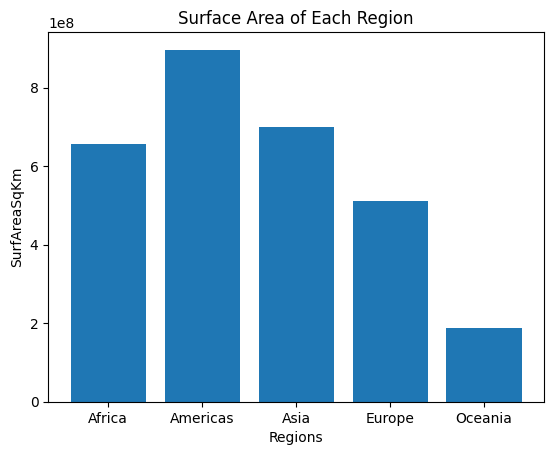

In [20]:
# @title Question 12: graph of all region's surface area

region_surface_area = clean_df.groupby('Region')['SurfAreaSqKm'].sum().to_dict()
x_axis = region_surface_area.keys()
y_axis = region_surface_area.values()

plt.bar(x_axis, y_axis)
plt.xlabel('Regions')
plt.ylabel('SurfAreaSqKm')
plt.title('Surface Area of Each Region')
plt.show()

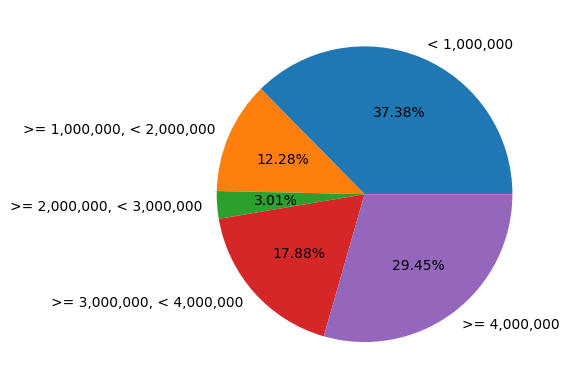

In [21]:
# @title Question 13: is there a correlation between surface area and total population

surf_pop = {
    '< 1,000,000' : clean_df[clean_df['SurfAreaSqKm'] < 1000000]['PopTotal'].sum(),
    '>= 1,000,000, < 2,000,000' : clean_df[(clean_df['SurfAreaSqKm'] >= 1000000) & (clean_df['SurfAreaSqKm'] < 2000000)]['PopTotal'].sum(),
    '>= 2,000,000, < 3,000,000' : clean_df[(clean_df['SurfAreaSqKm'] >= 2000000) & (clean_df['SurfAreaSqKm'] < 3000000)]['PopTotal'].sum(),
    '>= 3,000,000, < 4,000,000' : clean_df[(clean_df['SurfAreaSqKm'] >= 3000000) & (clean_df['SurfAreaSqKm'] < 4000000)]['PopTotal'].sum(),
    '>= 4,000,000' : clean_df[(clean_df['SurfAreaSqKm'] >= 4000000)]['PopTotal'].sum(),
}

x_axis = surf_pop.keys()
y_axis = surf_pop.values()

plt.pie(y_axis, labels=x_axis, autopct='%0.2f%%')
plt.show()

In [22]:
# @title Question 14: predicting gdp and population growth rate for certain sub region for coming years

year_region = clean_df.groupby(['Year', 'Region'])['GDPGrowth%'].mean().to_dict()

mapping = {
    'Africa': 1,
    'Americas': 2,
    'Asia': 3,
    'Europe': 4,
    'Oceania': 5
}

y_r, gdp = list(year_region.keys()), list(year_region.values())
X = []
Y = []
for i in range(len(y_r)):
    X.append([y_r[i][0], mapping[y_r[i][1]]])
    Y.append(gdp[i])

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print(f"Predicted GDP Growth % for Africa in 2022: {regr.predict([[2022, 1]])}") # year, region mapped number

year_region = clean_df.groupby(['Year', 'Region'])['PopGrowth%'].mean().to_dict()

y_r, pop_growth = list(year_region.keys()), list(year_region.values())
X = []
Y = []
for i in range(len(y_r)):
    X.append([y_r[i][0], mapping[y_r[i][1]]])
    Y.append(pop_growth[i])

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print(f"Predicted Population Growth % for Europe in 2022: {regr.predict([[2022, 4]])}") # year, region mapped number


Predicted GDP Growth % for Africa in 2022: [2.2569865]
Predicted Population Growth % for Europe in 2022: [0.69416722]


In [25]:
# @title Question 15: predicting gdp and population growth rate for certain region for coming years

year_subregion = clean_df.groupby(['Year', 'SubRegion'])['GDPGrowth%'].mean().to_dict()

mapping = {}
mapping_reverse = {}

i = 1
for i_tuple in year_subregion:
    if i_tuple[1] not in mapping.keys():
        mapping[i_tuple[1]] = i
        mapping_reverse[i] = i_tuple[1]
        i += 1

y_sr, gdp = list(year_subregion.keys()), list(year_subregion.values())
X = []
Y = []
for i in range(len(y_sr)):
    X.append([y_sr[i][0], mapping[y_sr[i][1]]])
    Y.append(gdp[i])

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print(f"Predicted GDP Growth % for {mapping_reverse[2]} in 2022: {regr.predict([[2022, 2]])}") # year, sub-region mapped number

year_subregion = clean_df.groupby(['Year', 'SubRegion'])['PopGrowth%'].mean().to_dict()

y_sr, pop_growth = list(year_subregion.keys()), list(year_subregion.values())
X = []
Y = []
for i in range(len(y_sr)):
    X.append([y_sr[i][0], mapping[y_sr[i][1]]])
    Y.append(pop_growth[i])

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print(f"Predicted Population Growth % for {mapping_reverse[4]} in 2022: {regr.predict([[2022, 4]])}") # year, sub-region mapped number


Predicted GDP Growth % for Central Asia in 2022: [1.92036138]
Predicted Population Growth % for Eastern Europe in 2022: [0.7847171]
